## 1. Importing the required libraries for EDA

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("..\day-5\data.csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [17]:
df = df.drop(['Engine Fuel Type', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size', 'Market Category'], axis = 1)

In [18]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [19]:
df = df.rename(columns ={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive_mode', 'highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price'})

In [20]:
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive_mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [21]:
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(989, 10)


In [22]:
df = df.drop_duplicates()
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive_mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [23]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive_mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [24]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive_mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [25]:
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive_mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10827 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          10827 non-null  object 
 1   Model         10827 non-null  object 
 2   Year          10827 non-null  int64  
 3   HP            10827 non-null  float64
 4   Cylinders     10827 non-null  float64
 5   Transmission  10827 non-null  object 
 6   Drive_mode    10827 non-null  object 
 7   MPG-H         10827 non-null  int64  
 8   MPG-C         10827 non-null  int64  
 9   Price         10827 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.4+ KB


In [35]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3-Q1
print(IQR)
print(Q1,Q3)
print(IQR)
print(Q1 - 1.5*IQR, Q3 - 1.5*IQR)

21327.5
21972.5 43300.0
21327.5
-10018.75 11308.75


In [34]:
Q1 = df['MPG-H'].quantile(0.25)
Q3 = df['MPG-H'].quantile(0.75)
IQR = Q3-Q1
print(Q1,Q3)
print(IQR)
print(Q1 - 1.5*IQR, Q3 - 1.5*IQR)

22.0 30.0
8.0
10.0 18.0


<Axes: xlabel='Price'>

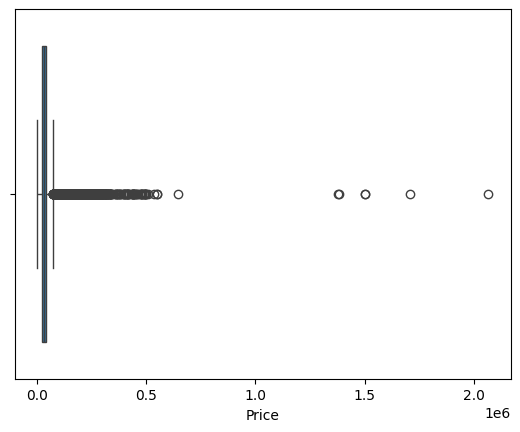

In [32]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

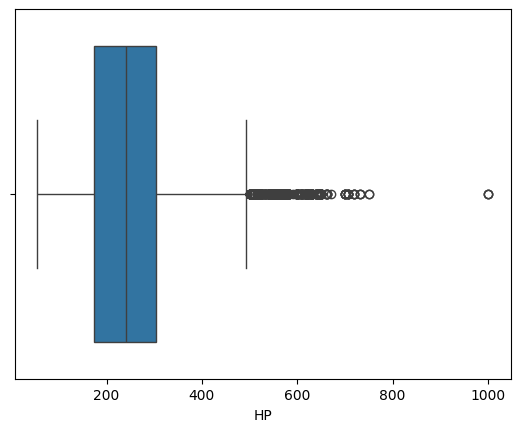

In [33]:
sns.boxplot(x=df['HP'])

Text(0.5, 0, 'Make')

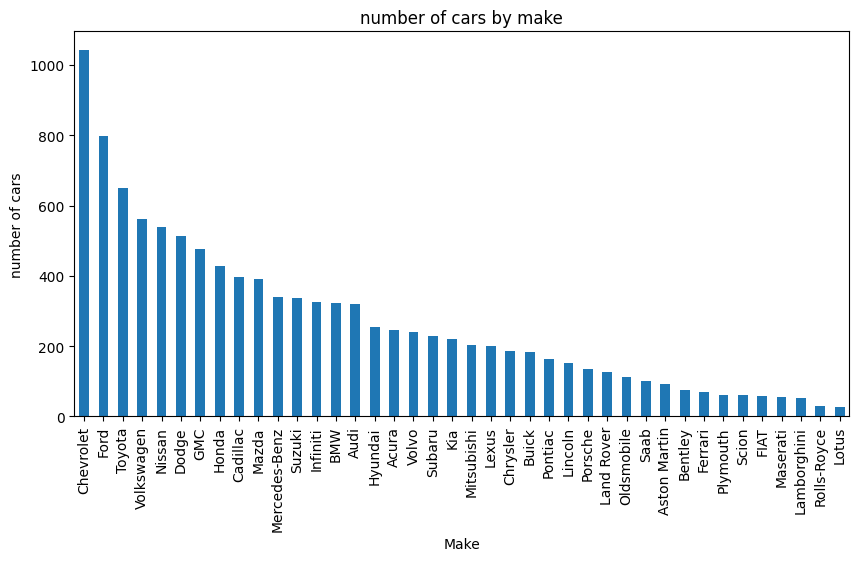

In [38]:
df.Make.value_counts().nlargest(40).plot(kind = 'bar', figsize = (10,5))
plt.title("number of cars by make")
plt.ylabel("number of cars")
plt.xlabel("Make")

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


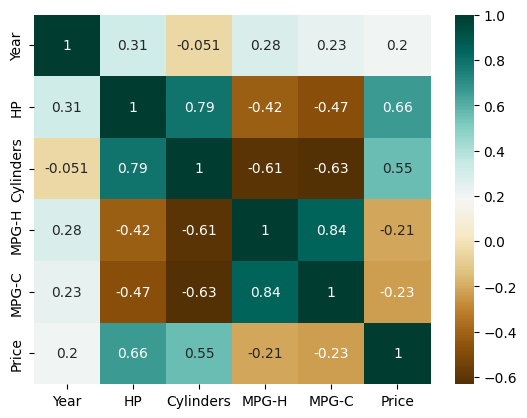

In [41]:
c = df.select_dtypes(include = [np.number])
c = c.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

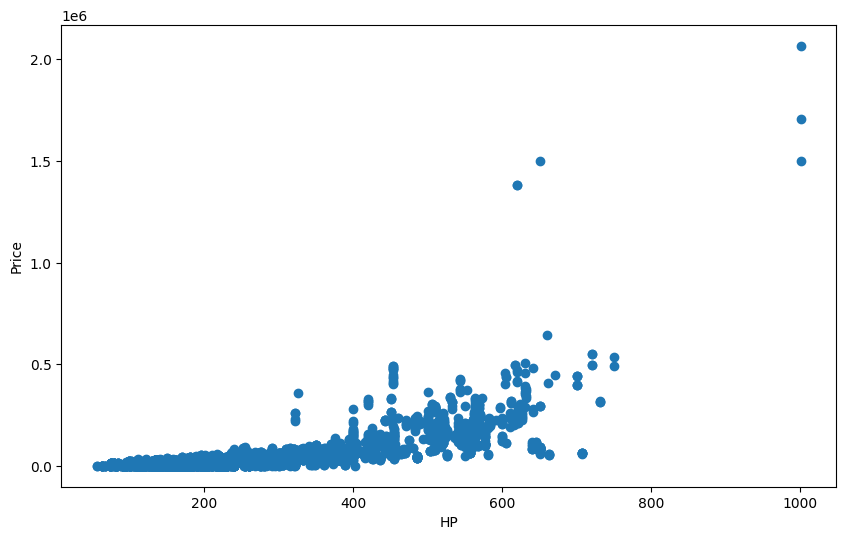

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

In [47]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.9 MB 12.6 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/8.9 MB 11.2 MB/s eta 0:00:01
   ----------------------- ---------------- 5.2/8.9 MB 9.1 MB/s eta 0:00:01
   ----------------------------------- ---- 7.9/8.9 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 9.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   --- ------------------------------------ 3.7/38.6 MB 19.8 MB/s eta 0:00:02
   ------ --------------------------------- 6.0/38.6 MB 14.8 MB/s eta 0:00:03
   -------- ------------------------------- 8.7/38.6 MB 14.1 MB/s eta 0:00:03
   ----------- ---------------------------- 11.0/38.6 MB 13.0 MB/s eta 0:00:03
   -------------- ------------------------- 14.2/38.6 MB 13.5 MB/s eta 0:00:02
   ---------------- ----------------------- 16.3/38.6 MB 13.1 MB/s eta 0:00:02
   ----


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
